#  IST 707 Data Analytics 
# HW1: Association Rule Mining


Installing required Packages

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import seaborn as sns 

#setting working Directory

import os
os.chdir("C:/Users/ritshetty/Desktop/iSchool FALL 19/IST 707 Data Analytics/HW 1")
os.getcwd()

#### Data Exploration 

In [80]:
data = pd.read_csv('employee_attrition.csv')
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1174.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1175.000000,...,1175.000000,1176.0,1176.000000,1174.000000,1176.000000,1176.000000,1176.000000,1176.000000,1175.000000,1176.000000
mean,36.960034,800.386905,9.495741,2.895408,1.0,1036.430272,2.704932,65.822279,2.740646,2.068936,...,2.718298,80.0,0.795918,11.402896,2.809524,2.747449,6.918367,4.151361,2.125106,4.242347
std,9.071964,404.709216,10.251379,1.025685,0.0,600.681874,1.094128,20.292035,0.719277,1.109590,...,1.084095,0.0,0.847033,8.368864,1.307697,0.691586,6.107140,3.501618,3.183567,7.210390
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,461.750000,2.000000,2.000000,1.0,499.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.000000,7.000000,3.000000,1.0,1032.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,4.000000,1.0,1574.500000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,224.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,114.000000,6.000000,4.000000,40.000000,18.000000,15.000000,219.000000


In [3]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,...,3.0,80,2,4.0,2,2,2,1,2.0,2
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,...,2.0,80,1,9.0,3,3,5,2,1.0,4
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,...,1.0,80,0,10.0,6,3,5,4,0.0,3
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,...,4.0,80,1,34.0,3,3,33,9,15.0,0
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,...,4.0,80,0,11.0,3,1,11,8,3.0,3
5,51,No,Travel_Rarely,1318,Sales,26.0,4,Marketing,1,851,...,3.0,80,1,29.0,2,2,20,6,4.0,17
6,42,No,Travel_Rarely,932,Research & Development,1.0,2,Life Sciences,1,827,...,4.0,80,1,8.0,4,3,4,3,0.0,2
7,23,No,Travel_Rarely,507,Research & Development,20.0,1,Life Sciences,1,1533,...,2.0,80,0,5.0,2,3,4,3,1.0,2
8,38,No,Travel_Rarely,1153,Research & Development,6.0,2,Other,1,1782,...,2.0,80,1,5.0,3,3,5,4,0.0,4
9,27,Yes,Travel_Rarely,1420,Sales,2.0,1,Marketing,1,667,...,2.0,80,1,5.0,3,3,4,3,0.0,2


#### Data preprocessing, cleaning, transformation

In [4]:
# Remove Duplicates

data.drop_duplicates(keep= False, inplace = True)

In [5]:
#Check for Duplicates
sum(data.duplicated())

0

In [6]:
# Remove NAs

data.dropna(inplace=True)

#Check for NAs
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Data Preprocessing : Discretization

In [8]:

data['age_group'] = pd.qcut(data.Age,3,
                           labels = ['low_age','med_age','high_age'])

data['daily_rate_group'] = pd.cut(data.DailyRate, 3,
                          labels = ['low_drate','med_drate','high_drate'])

data['dist_home_group'] = pd.cut(data.DistanceFromHome,2,
                                labels = ['small_dist', 'long_dist'])

data['education_group'] = pd.cut(data.Education, 2,
                                labels = ['low_edu', 'high_edu'])

In [9]:
data['envoiSat_group'] = pd.cut(data.EnvironmentSatisfaction, 2,
                                labels = ['low_sat', 'high_sat'])

In [10]:
data['hourlyrate_group'] = pd.cut(data.HourlyRate,[0,65,100],
                                labels = ['low_hrRate', 'high_hrRate'])

In [11]:
data['JobInvolvement_group'] = pd.cut(data.JobInvolvement, 2,
                                labels = ['low_involv', 'high_involv'])

In [12]:
data['JobLevel_group'] = pd.cut(data.JobLevel, 3,
                                labels = ['low_level', 'mid_level', 'high_level'])

In [13]:
data['JobSatisfaction_group'] = pd.cut(data.JobSatisfaction, 2,
                                labels = ['low_jobSat', 'high_jobSat'])

In [14]:
data['MonthlyIncome_group'] = pd.cut(data.MonthlyIncome,3,
                                labels = ['low_MonInc','med_MonInc' ,'high_MonInc'])

In [15]:
data['MonthlyRate_group'] = pd.cut(data.MonthlyRate,3,
                                labels = ['low_MonRate','med_MonRate' ,'high_MonRate'])

In [16]:
data['NumCompaniesWorked_group'] = pd.cut(data.NumCompaniesWorked, [0,5,10],
                                labels = ['less_than_5', 'more_than_5'])

In [17]:
data['PercentSalaryHike_group'] = pd.cut(data.PercentSalaryHike, 2,
                                labels = ['low_hike','high_hike'])

In [18]:
data['PerformanceRating_group'] = pd.cut(data.PerformanceRating, 3,
                                labels = ['poor','avg','good'])

In [19]:
data['RelationshipSatisfaction_group'] = pd.cut(data.RelationshipSatisfaction, 3,
                                labels = ['poor','avg','good'])

In [20]:
data['StockOptionLevel_group'] = pd.cut(data.StockOptionLevel, 3,
                                labels = ['less','avg','high'])

In [21]:
data['TotalWorkingYears_group'] = pd.cut(data.TotalWorkingYears, 3,
                                labels = ['low','mid','high'])

In [22]:
data['TrainingTimesLastYear_group'] = pd.cut(data.TrainingTimesLastYear, 3,
                                labels = ['low','mid','high'])

In [23]:
data['WorkLifeBalance_group'] = pd.cut(data.WorkLifeBalance, 2,
                                labels = ['poor','Good'])

In [24]:
data['YearsAtCompany'] = pd.cut(data.YearsAtCompany,[0,7,40],
                                labels = ['less_than_7','more_than_7'])

In [25]:
data['YearsInCurrentRole_group'] = pd.cut(data.YearsInCurrentRole,[0,5,19],
                                labels = ['less_than_5','more_than_5'])

In [26]:
data['YearsSinceLastPromotion_group'] = pd.cut(data.YearsSinceLastPromotion,[0,3,15],
                                labels = ['less_than_3','more_than_3'])

In [27]:
data['YearsWithCurrManager_group'] = pd.cut(data.YearsWithCurrManager,2,
                                labels = ['few','many'])

In [28]:
data = data.drop(['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction'
                 ,'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked'
                 ,'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears'
                 ,'TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)

In [29]:
data.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,StandardHours,...,PercentSalaryHike_group,PerformanceRating_group,RelationshipSatisfaction_group,StockOptionLevel_group,TotalWorkingYears_group,TrainingTimesLastYear_group,WorkLifeBalance_group,YearsInCurrentRole_group,YearsSinceLastPromotion_group,YearsWithCurrManager_group
0,No,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Married,Y,No,80,...,low_hike,poor,avg,avg,low,low,poor,less_than_5,less_than_3,few
1,No,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,No,80,...,high_hike,good,poor,less,low,mid,Good,less_than_5,less_than_3,few
2,No,Travel_Rarely,Sales,Medical,Female,Sales Executive,Single,Y,No,80,...,low_hike,poor,poor,less,low,high,Good,less_than_5,NaN,few
3,No,Non-Travel,Research & Development,Medical,Male,Healthcare Representative,Divorced,Y,Yes,80,...,low_hike,poor,good,less,low,mid,Good,more_than_5,more_than_3,few
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,Healthcare Representative,Single,Y,No,80,...,high_hike,poor,good,less,low,mid,poor,more_than_5,less_than_3,few


In [30]:
data = data.drop(['StandardHours'],axis=1)

In [31]:
data.dropna(inplace = True)

# Preparing Data for ARM

In [32]:
data = data.astype('str')
data[data.columns] = data.apply(lambda x: x.str.strip())
data = data.astype('object')
data2 = pd.DataFrame({col:str(col)+'=' for col in data}, index =data.index) + data.astype(str)
data2.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,YearsAtCompany,...,PercentSalaryHike_group,PerformanceRating_group,RelationshipSatisfaction_group,StockOptionLevel_group,TotalWorkingYears_group,TrainingTimesLastYear_group,WorkLifeBalance_group,YearsInCurrentRole_group,YearsSinceLastPromotion_group,YearsWithCurrManager_group
0,Attrition=No,BusinessTravel=Travel_Rarely,Department=Sales,EducationField=Life Sciences,Gender=Male,JobRole=Sales Executive,MaritalStatus=Married,Over18=Y,OverTime=No,YearsAtCompany=less_than_7,...,PercentSalaryHike_group=low_hike,PerformanceRating_group=poor,RelationshipSatisfaction_group=avg,StockOptionLevel_group=avg,TotalWorkingYears_group=low,TrainingTimesLastYear_group=low,WorkLifeBalance_group=poor,YearsInCurrentRole_group=less_than_5,YearsSinceLastPromotion_group=less_than_3,YearsWithCurrManager_group=few
1,Attrition=No,BusinessTravel=Travel_Rarely,Department=Research & Development,EducationField=Life Sciences,Gender=Female,JobRole=Laboratory Technician,MaritalStatus=Married,Over18=Y,OverTime=No,YearsAtCompany=less_than_7,...,PercentSalaryHike_group=high_hike,PerformanceRating_group=good,RelationshipSatisfaction_group=poor,StockOptionLevel_group=less,TotalWorkingYears_group=low,TrainingTimesLastYear_group=mid,WorkLifeBalance_group=Good,YearsInCurrentRole_group=less_than_5,YearsSinceLastPromotion_group=less_than_3,YearsWithCurrManager_group=few
3,Attrition=No,BusinessTravel=Non-Travel,Department=Research & Development,EducationField=Medical,Gender=Male,JobRole=Healthcare Representative,MaritalStatus=Divorced,Over18=Y,OverTime=Yes,YearsAtCompany=more_than_7,...,PercentSalaryHike_group=low_hike,PerformanceRating_group=poor,RelationshipSatisfaction_group=good,StockOptionLevel_group=less,TotalWorkingYears_group=low,TrainingTimesLastYear_group=mid,WorkLifeBalance_group=Good,YearsInCurrentRole_group=more_than_5,YearsSinceLastPromotion_group=more_than_3,YearsWithCurrManager_group=few
4,Attrition=No,BusinessTravel=Travel_Rarely,Department=Research & Development,EducationField=Life Sciences,Gender=Female,JobRole=Healthcare Representative,MaritalStatus=Single,Over18=Y,OverTime=No,YearsAtCompany=more_than_7,...,PercentSalaryHike_group=high_hike,PerformanceRating_group=poor,RelationshipSatisfaction_group=good,StockOptionLevel_group=less,TotalWorkingYears_group=low,TrainingTimesLastYear_group=mid,WorkLifeBalance_group=poor,YearsInCurrentRole_group=more_than_5,YearsSinceLastPromotion_group=less_than_3,YearsWithCurrManager_group=few
5,Attrition=No,BusinessTravel=Travel_Rarely,Department=Sales,EducationField=Marketing,Gender=Female,JobRole=Manager,MaritalStatus=Married,Over18=Y,OverTime=No,YearsAtCompany=more_than_7,...,PercentSalaryHike_group=low_hike,PerformanceRating_group=poor,RelationshipSatisfaction_group=avg,StockOptionLevel_group=less,TotalWorkingYears_group=low,TrainingTimesLastYear_group=low,WorkLifeBalance_group=poor,YearsInCurrentRole_group=more_than_5,YearsSinceLastPromotion_group=more_than_3,YearsWithCurrManager_group=few


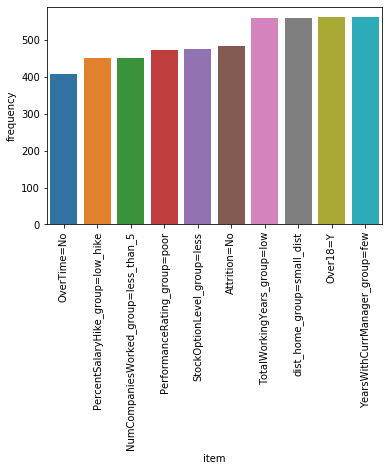

In [33]:
#Visulizing Frequent dataset

melted_data = pd.melt(data2)
melted_data.head()
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=True)
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})
g = sns.barplot(data=freq_itemset.tail(10), x='item', y='frequency')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

# Association Rules using Mlxtend Library

In [34]:
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [35]:
transactions = []
for i in range(0,len(data2)):
    transactions.append([str(data2.values[i,j]) 
    for j in range(0, len(data2.columns))])

In [36]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Classification with Association Rule Mining

In [51]:
def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filter according to lift
    rules = rules[rules['lift']>min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)
    
Rules = SupervisedApriori(df,consequent = ['Attrition=No','Attrition=Yes'],
min_supp=0.5, min_conf=0.5, min_lift=1).sort_values(by='support',ascending=False)

In [52]:
Rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,"(Over18=Y, TotalWorkingYears_group=low)",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
143,"(Over18=Y, TotalWorkingYears_group=low, YearsW...",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
6,(TotalWorkingYears_group=low),(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
55,"(TotalWorkingYears_group=low, YearsWithCurrMan...",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
293,"(Over18=Y, TotalWorkingYears_group=low, YearsW...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
144,"(Over18=Y, TotalWorkingYears_group=low, dist_h...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
56,"(TotalWorkingYears_group=low, dist_home_group=...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
180,"(TotalWorkingYears_group=low, YearsWithCurrMan...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
140,"(StockOptionLevel_group=less, Over18=Y, TotalW...",(Attrition=No),0.841355,0.860963,0.725490,0.862288,1.001540,0.001115,1.009626
52,"(StockOptionLevel_group=less, TotalWorkingYear...",(Attrition=No),0.841355,0.860963,0.725490,0.862288,1.001540,0.001115,1.009626


# Model Tuning

In [ ]:
# We first ran the algorithm with a min support as 0.5 & min confdence of 0.5 to get the above top 10 Rules 
# We again Run the model by increasing the confidence to 0.8


In [49]:
SupervisedApriori(df,consequent = ['Attrition=No','Attrition=Yes'],
min_supp=0.5, min_conf=0.8, min_lift=1).sort_values(by='support',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,"(Over18=Y, TotalWorkingYears_group=low)",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
143,"(Over18=Y, TotalWorkingYears_group=low, YearsW...",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
6,(TotalWorkingYears_group=low),(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
55,"(TotalWorkingYears_group=low, YearsWithCurrMan...",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
293,"(Over18=Y, TotalWorkingYears_group=low, YearsW...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
144,"(Over18=Y, TotalWorkingYears_group=low, dist_h...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
56,"(TotalWorkingYears_group=low, dist_home_group=...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
180,"(TotalWorkingYears_group=low, YearsWithCurrMan...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
140,"(StockOptionLevel_group=less, Over18=Y, TotalW...",(Attrition=No),0.841355,0.860963,0.725490,0.862288,1.001540,0.001115,1.009626
52,"(StockOptionLevel_group=less, TotalWorkingYear...",(Attrition=No),0.841355,0.860963,0.725490,0.862288,1.001540,0.001115,1.009626


In [ ]:
# The above 2 set of Rules 
1. Support = 0.5   Confidence = 0.5   Lift = 1
2. Support = 0.5   Confidence = 0.8   Lift = 1

#### Tuning again with higher support value as 0.7 we discovered the following Rules

In [77]:
Rules = SupervisedApriori(df,consequent = ['Attrition=No','Attrition=Yes'],
min_supp=0.7, min_conf=0.8, min_lift=1).sort_values(by='support',ascending=False)

In [78]:
Rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,"(Over18=Y, TotalWorkingYears_group=low, YearsW...",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
6,"(Over18=Y, TotalWorkingYears_group=low)",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
8,"(TotalWorkingYears_group=low, YearsWithCurrMan...",(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
1,(TotalWorkingYears_group=low),(Attrition=No),0.994652,0.860963,0.859180,0.863799,1.003295,0.002822,1.020827
25,"(Over18=Y, TotalWorkingYears_group=low, YearsW...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
9,"(TotalWorkingYears_group=low, dist_home_group=...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
20,"(TotalWorkingYears_group=low, YearsWithCurrMan...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
17,"(Over18=Y, TotalWorkingYears_group=low, dist_h...",(Attrition=No),0.992870,0.860963,0.857398,0.863555,1.003011,0.002574,1.018998
23,"(StockOptionLevel_group=less, Over18=Y, TotalW...",(Attrition=No),0.841355,0.860963,0.725490,0.862288,1.001540,0.001115,1.009626
7,"(StockOptionLevel_group=less, TotalWorkingYear...",(Attrition=No),0.841355,0.860963,0.725490,0.862288,1.001540,0.001115,1.009626


In [70]:
str(Rules.values[0,0])+ '->' + str(Rules.values[0,1])


"frozenset({'Over18=Y', 'TotalWorkingYears_group=low', 'YearsWithCurrManager_group=few'})->frozenset({'Attrition=No'})"

In [71]:
str(Rules.values[1,0])+ '->' + str(Rules.values[1,1])


"frozenset({'Over18=Y', 'TotalWorkingYears_group=low'})->frozenset({'Attrition=No'})"

In [72]:
str(Rules.values[2,0])+ '->' + str(Rules.values[2,1])


"frozenset({'TotalWorkingYears_group=low', 'YearsWithCurrManager_group=few'})->frozenset({'Attrition=No'})"

#### The Above set of Rules are most relevant Because it has high Support = 0.7 Confidence = 0.8 & Lift 1
#### On comparison with previous rules the Lift & Confidence remain same so the deciding factor is Support which is higer for this set of rules
#### The most relevant Rules are the top 10 from the Above set, Specifically the most relevant rules are Top 3 
#### Which shows that when 'TotalWorkingYears_group=low' & 'YearsWithCurrManager_group=few' then 'Attrition=No'
#### We are considering the Top 10 Rules as interesting Rules because they have higest lift that is >1 & very high Support of >= 0.7 which means high frequencies & Also, high Confidence of 0.8 which indicates high association between the items in the rules

# Plotting the Rules

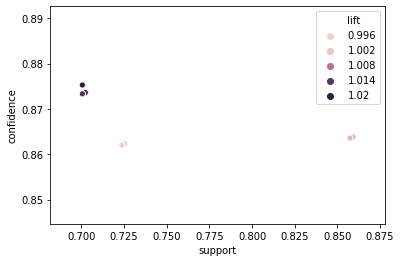

In [79]:
b = sns.scatterplot(data=Rules,x='support',y='confidence',hue='lift')
plt.show()